<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [18]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_4'

In [20]:
os.listdir(base_path)

['data_add_delta_4_n250.csv',
 'data_add_delta_4_n120.csv',
 'data_add_delta_4_n60.csv',
 'data_add_delta_4_n30.csv',
 'data_add_delta_4_n20.csv']

In [21]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,91.285126,93.464467,67.994672,83.348440,-2708.180620,-2362.087915,2562.905840,-4924.993755
1,0.0,1.0,38.461766,68.994289,53.525368,93.649656,-5471.307041,-5206.675960,-1018.118793,-4188.557168
2,0.0,2.0,63.192313,84.114474,56.087679,55.296606,8509.818142,8778.509214,3119.685727,5658.823487
3,0.0,3.0,55.022761,49.472028,59.122835,61.276753,515.437413,750.331790,150.398796,599.932995
4,0.0,4.0,45.527880,53.683302,94.115484,50.822549,3313.474194,3567.623409,1694.025727,1873.597682
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,78.529963,43.651163,27.829526,42.203015,-2943.788623,-2741.574955,1955.489702,-4697.064657
19996,999.0,16.0,28.899016,35.738896,96.613610,44.759027,-291.457255,-75.446707,-868.059797,792.613089
19997,999.0,17.0,32.108222,24.029980,63.832325,51.112285,288.091599,469.174411,1159.155872,-689.981461
19998,999.0,18.0,68.250715,54.827207,77.587221,88.444260,-1887.642965,-1588.533562,-2987.940107,1399.406546


In [22]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,91.285126,93.464467,67.994672,83.348440,-2708.180620,-2362.087915,2562.905840,-4924.993755
1,0.0,1.0,38.461766,68.994289,53.525368,93.649656,-5471.307041,-5206.675960,-1018.118793,-4188.557168
2,0.0,2.0,63.192313,84.114474,56.087679,55.296606,8509.818142,8778.509214,3119.685727,5658.823487
3,0.0,3.0,55.022761,49.472028,59.122835,61.276753,515.437413,750.331790,150.398796,599.932995
4,0.0,4.0,45.527880,53.683302,94.115484,50.822549,3313.474194,3567.623409,1694.025727,1873.597682
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,78.529963,43.651163,27.829526,42.203015,-2943.788623,-2741.574955,1955.489702,-4697.064657
19996,999.0,16.0,28.899016,35.738896,96.613610,44.759027,-291.457255,-75.446707,-868.059797,792.613089
19997,999.0,17.0,32.108222,24.029980,63.832325,51.112285,288.091599,469.174411,1159.155872,-689.981461
19998,999.0,18.0,68.250715,54.827207,77.587221,88.444260,-1887.642965,-1588.533562,-2987.940107,1399.406546


In [23]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e            Y        y_hat        e_hat
rep   index                                                                                                
0.0   0.0    91.285126  93.464467  67.994672  83.348440 -2708.180620 -2362.087915  2562.905840 -4924.993755
      1.0    38.461766  68.994289  53.525368  93.649656 -5471.307041 -5206.675960 -1018.118793 -4188.557168
      2.0    63.192313  84.114474  56.087679  55.296606  8509.818142  8778.509214  3119.685727  5658.823487
      3.0    55.022761  49.472028  59.122835  61.276753   515.437413   750.331790   150.398796   599.932995
      4.0    45.527880  53.683302  94.115484  50.822549  3313.474194  3567.623409  1694.025727  1873.597682
...                ...        ...        ...        ...          ...          ...          ...          ...
999.0 15.0   78.529963  43.651163  27.829526  42.203015 -2943.788623 -2741.574955  1955.489702 -4697.064657
      16.0   28.899016  35.738896  96.613610  44.759027  -291.457255   -75.446707  -868.059797   792.613089
      17.0   32.108222  24.029980  63.832325  51.112285   288.091599   469.174411  1159.155872  -689.981461
      18.0   68.250715  54.827207  77.587221  88.444260 -1887.642965 -1588.533562 -2987.940107  1399.406546
      19.0   50.575954  51.798685  54.095169  63.940914    96.519502   326.930224  -870.002087  1196.932311

[20000 rows x 8 columns]

In [24]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e            Y        y_hat        e_hat
rep   index                                                                                                
0.0   0.0    91.285126  93.464467  67.994672  83.348440 -2708.180620 -2362.087915  2562.905840 -4924.993755
      1.0    38.461766  68.994289  53.525368  93.649656 -5471.307041 -5206.675960 -1018.118793 -4188.557168
      2.0    63.192313  84.114474  56.087679  55.296606  8509.818142  8778.509214  3119.685727  5658.823487
      3.0    55.022761  49.472028  59.122835  61.276753   515.437413   750.331790   150.398796   599.932995
      4.0    45.527880  53.683302  94.115484  50.822549  3313.474194  3567.623409  1694.025727  1873.597682
...                ...        ...        ...        ...          ...          ...          ...          ...
999.0 15.0   78.529963  43.651163  27.829526  42.203015 -2943.788623 -2741.574955  1955.489702 -4697.064657
      16.0   28.899016  35.738896  96.613610  44.759027  -291.457255   -75.446707  -868.059797   792.613089
      17.0   32.108222  24.029980  63.832325  51.112285   288.091599   469.174411  1159.155872  -689.981461
      18.0   68.250715  54.827207  77.587221  88.444260 -1887.642965 -1588.533562 -2987.940107  1399.406546
      19.0   50.575954  51.798685  54.095169  63.940914    96.519502   326.930224  -870.002087  1196.932311

[20000 rows x 8 columns]

In [25]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,91.285126,93.464467,67.994672,83.348440,-2708.180620,-2362.087915,2562.905840,-4924.993755
1,0.0,1.0,38.461766,68.994289,53.525368,93.649656,-5471.307041,-5206.675960,-1018.118793,-4188.557168
2,0.0,2.0,63.192313,84.114474,56.087679,55.296606,8509.818142,8778.509214,3119.685727,5658.823487
3,0.0,3.0,55.022761,49.472028,59.122835,61.276753,515.437413,750.331790,150.398796,599.932995
4,0.0,4.0,45.527880,53.683302,94.115484,50.822549,3313.474194,3567.623409,1694.025727,1873.597682
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,78.529963,43.651163,27.829526,42.203015,-2943.788623,-2741.574955,1955.489702,-4697.064657
19996,999.0,16.0,28.899016,35.738896,96.613610,44.759027,-291.457255,-75.446707,-868.059797,792.613089
19997,999.0,17.0,32.108222,24.029980,63.832325,51.112285,288.091599,469.174411,1159.155872,-689.981461
19998,999.0,18.0,68.250715,54.827207,77.587221,88.444260,-1887.642965,-1588.533562,-2987.940107,1399.406546


In [26]:
table.set_index(['rep', 'index'], inplace=True)

In [27]:
table

x1         x2         x3         x4            e            Y        y_hat        e_hat
rep   index                                                                                                
0.0   0.0    91.285126  93.464467  67.994672  83.348440 -2708.180620 -2362.087915  2562.905840 -4924.993755
      1.0    38.461766  68.994289  53.525368  93.649656 -5471.307041 -5206.675960 -1018.118793 -4188.557168
      2.0    63.192313  84.114474  56.087679  55.296606  8509.818142  8778.509214  3119.685727  5658.823487
      3.0    55.022761  49.472028  59.122835  61.276753   515.437413   750.331790   150.398796   599.932995
      4.0    45.527880  53.683302  94.115484  50.822549  3313.474194  3567.623409  1694.025727  1873.597682
...                ...        ...        ...        ...          ...          ...          ...          ...
999.0 15.0   78.529963  43.651163  27.829526  42.203015 -2943.788623 -2741.574955  1955.489702 -4697.064657
      16.0   28.899016  35.738896  96.613610  44.759027  -291.457255   -75.446707  -868.059797   792.613089
      17.0   32.108222  24.029980  63.832325  51.112285   288.091599   469.174411  1159.155872  -689.981461
      18.0   68.250715  54.827207  77.587221  88.444260 -1887.642965 -1588.533562 -2987.940107  1399.406546
      19.0   50.575954  51.798685  54.095169  63.940914    96.519502   326.930224  -870.002087  1196.932311

[20000 rows x 8 columns]

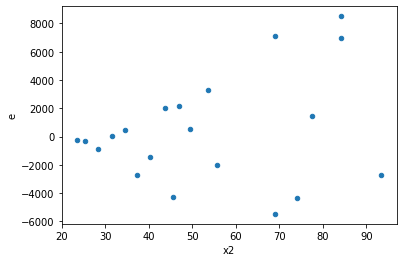

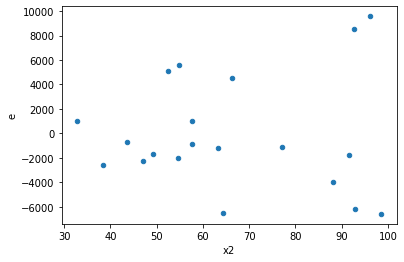

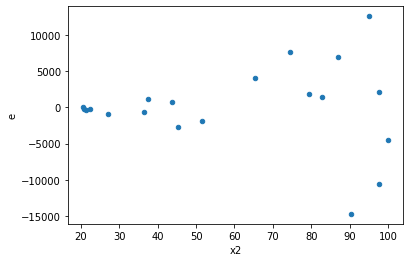

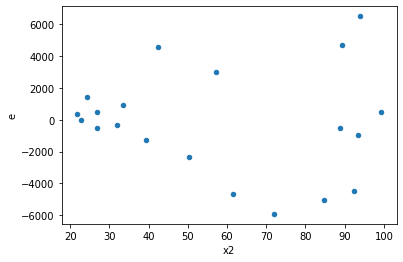

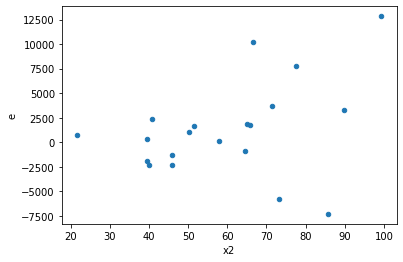

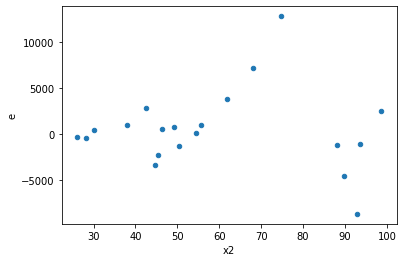

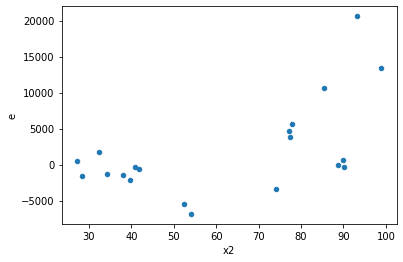

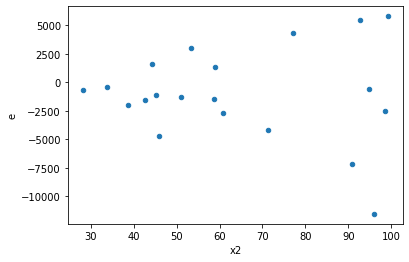

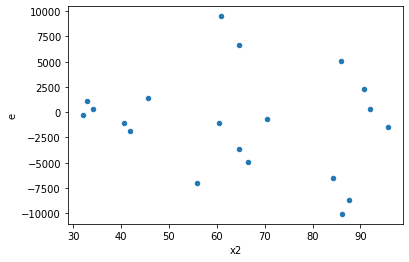

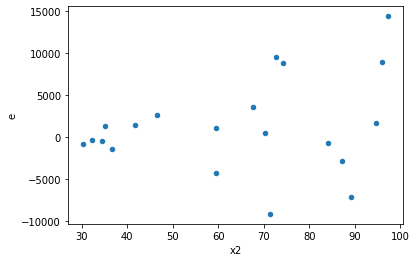

In [28]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [29]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # Correlation between two columns of DataFrame.
    corr_x1 = new_table['x1'].corr(new_table['Y'])
    corr_x2 = new_table['x2'].corr(new_table['Y'])
    corr_x3 = new_table['x3'].corr(new_table['Y'])
    corr_x4 = new_table['x4'].corr(new_table['Y'])

    # Correlation between all the columns of DataFrame.
    all_corr = new_table.corr()

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return corr_x1, corr_x2, corr_x3, corr_x4, df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_corr_x1=[]
list_corr_x2=[]
list_corr_x3=[]
list_corr_x4=[]
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    corr_x1, corr_x2, corr_x3, corr_x4, df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_corr_x1.append(corr_x1)
    list_corr_x2.append(corr_x2)
    list_corr_x3.append(corr_x3)
    list_corr_x4.append(corr_x4)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [30]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "corr_x1":list_corr_x1, "corr_x2":list_corr_x2, "corr_x3":list_corr_x3, "corr_x4":list_corr_x4, 
                     "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1, "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,corr_x1,corr_x2,corr_x3,corr_x4,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,,,,,
0.0,0.037657040633699165,0.2771227555642905,0.027077325676002347,-0.23097438010312332,4.0,4.0,15975764.040202837,79460944.90788573,3993941.0100507094,19865236.226971433,4.973843173191788,0.14936654327430832,0.9253167283628458,0.07468327163715416,Reject001=1 : Homoscedasticity
1.0,-0.07648562606700704,0.017781904125646064,0.10907404261017782,-0.37692659111370896,4.0,4.0,39015371.909308836,75683790.76203845,9753842.977327209,18920947.690509614,1.9398454265145875,0.5367985707008014,0.7316007146495993,0.2683992853504007,Reject001=1 : Homoscedasticity
4.0,-0.1519257492869782,0.3582878708164185,0.14879860788731603,0.04354721774404883,4.0,4.0,58397911.620355725,67041998.27173401,14599477.905088931,16760499.567933502,1.1480204755877814,0.8967983452950281,0.551600827352486,0.44839917264751405,Reject001=1 : Homoscedasticity
5.0,0.3320869571923541,-0.052554433520337084,-0.22609599701664426,-0.01405349519259462,4.0,4.0,9872575.370836549,80263801.13356085,2468143.842709137,20065950.283390213,8.129976031447582,0.06672407385434997,0.966637963072825,0.03336203692717499,Reject001=1 : Homoscedasticity
6.0,-0.08029842613871241,0.574843431506993,-0.0986410673694498,0.3243954397674925,4.0,4.0,3462674.233554636,153305963.44281575,865668.558388659,38326490.86070394,44.27386265714008,0.0028841213376948893,0.9985579393311526,0.0014420606688474447,Reject001=0 : Heteroscedasticity
8.0,0.052799971215906884,-0.1900496935867316,-0.2703943946900495,-0.3177997992959798,4.0,4.0,50626663.57808523,103988671.29964115,12656665.894521307,25997167.824910287,2.054029713794032,0.5028633025383269,0.7485683487308366,0.25143165126916345,Reject001=1 : Homoscedasticity
10.0,0.21750176286285147,0.00712552672489036,-0.08158929573714627,0.2591717564471336,4.0,4.0,48348565.44347073,88211292.90873642,12087141.360867683,22052823.227184106,1.8244862510320663,0.5745766669925412,0.7127116665037294,0.2872883334962706,Reject001=1 : Homoscedasticity
14.0,0.24159988872486873,0.03740670111661415,-0.06326226428434395,-0.11202582767081685,4.0,4.0,25426720.747592676,73674572.02057423,6356680.186898169,18418643.005143557,2.897525510738521,0.32741783695750115,0.8362910815212494,0.16370891847875058,Reject001=1 : Homoscedasticity
15.0,-0.07279417191543185,0.333120532099194,-0.3432655960780445,-0.11548899246374544,4.0,4.0,65993838.67110857,500791595.77118844,16498459.667777143,125197898.94279711,7.588459860123728,0.07502895198422443,0.9624855240078878,0.03751447599211222,Reject001=1 : Homoscedasticity


In [31]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "corr_x1":list_corr_x1, "corr_x2":list_corr_x2, "corr_x3":list_corr_x3, "corr_x4":list_corr_x4, 
                     "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1, "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,corr_x1,corr_x2,corr_x3,corr_x4,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,,,,,
0.0,0.037657040633699165,0.2771227555642905,0.027077325676002347,-0.23097438010312332,4.0,4.0,15975764.040202837,79460944.90788573,3993941.0100507094,19865236.226971433,4.973843173191788,0.14936654327430832,Reject001=1 : Homoscedasticity
1.0,-0.07648562606700704,0.017781904125646064,0.10907404261017782,-0.37692659111370896,4.0,4.0,39015371.909308836,75683790.76203845,9753842.977327209,18920947.690509614,1.9398454265145875,0.5367985707008014,Reject001=1 : Homoscedasticity
2.0,0.20327630649648387,-0.0012712709947360402,-0.18160094905866517,0.05567789097310282,4.0,4.0,160770450.90575975,327951.1792998445,40192612.72643994,81987.79482496112,0.0020398722367960674,2.4831181097659905e-05,Reject001=0 : Heteroscedasticity
3.0,0.4694984834931124,-0.0677332186471689,0.056408906164818834,-0.01553500400184936,4.0,4.0,36552505.029523686,32490446.513184976,9138126.257380921,8122611.628296244,0.8888705845725824,0.9118511389840849,Reject001=1 : Homoscedasticity
4.0,-0.1519257492869782,0.3582878708164185,0.14879860788731603,0.04354721774404883,4.0,4.0,58397911.620355725,67041998.27173401,14599477.905088931,16760499.567933502,1.1480204755877814,0.8967983452950281,Reject001=1 : Homoscedasticity
5.0,0.3320869571923541,-0.052554433520337084,-0.22609599701664426,-0.01405349519259462,4.0,4.0,9872575.370836549,80263801.13356085,2468143.842709137,20065950.283390213,8.129976031447582,0.06672407385434997,Reject001=1 : Homoscedasticity
6.0,-0.08029842613871241,0.574843431506993,-0.0986410673694498,0.3243954397674925,4.0,4.0,3462674.233554636,153305963.44281575,865668.558388659,38326490.86070394,44.27386265714008,0.0028841213376948893,Reject001=0 : Heteroscedasticity
7.0,0.011520053724274159,-0.038597216785073704,-0.40367518387381657,0.005527437937531718,4.0,4.0,26461678.353963964,17313699.528562784,6615419.588490991,4328424.882140696,0.6542933255013732,0.691099896423703,Reject001=1 : Homoscedasticity
8.0,0.052799971215906884,-0.1900496935867316,-0.2703943946900495,-0.3177997992959798,4.0,4.0,50626663.57808523,103988671.29964115,12656665.894521307,25997167.824910287,2.054029713794032,0.5028633025383269,Reject001=1 : Homoscedasticity


In [32]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      837
Reject001=0 : Heteroscedasticity    163
Name: Result_test, dtype: int64